# Parameter Estimation for a Gaussian Distribution

This notebook demonstrates the concept of **parameter estimation**. We will:
1. Define a "true" Gaussian (Normal) distribution with a known **mean** and **variance**.
2. Generate a large random sample of data from this distribution.
3. Write a function to *estimate* the mean and variance using only the generated data.
4. Visually compare the true distribution with our estimated distribution to see how well our estimation worked.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## 1. Parameter Estimation Function

This function calculates the sample **mean** and sample **variance** for a given dataset. For a Gaussian distribution, these calculations are the **Maximum Likelihood Estimates (MLE)** for the distribution's parameters.

In [2]:
def estimate_params(x):
    """Estimates the mean and variance of a given dataset x."""
    # Get the total number of data points.
    n = len(x)
    # Calculate the sample mean.
    mean = sum(x) / n
    # Calculate the sample variance.
    var = sum((x - mean) ** 2) / n
    # Return the estimated parameters.
    return mean, var

## 2. Generating Data and Estimating Parameters

First, we'll define our true parameters. Then, we'll generate a large dataset based on them and use our function to estimate the parameters back from the data. We expect the estimated values to be very close to the true values.

In [3]:
# Define the "ground truth" parameters for our normal distribution.
true_mean = 2
true_var = 5

# Generate a large dataset (10,000 points) of random numbers from the true distribution.
# Note: np.random.normal takes the standard deviation (sqrt of variance) as an argument.
data = np.random.normal(true_mean, np.sqrt(true_var), 10**4)

print("--- True Parameters ---")
print(f"Mean: {true_mean}, Variance: {true_var}\n")

# Call our function to estimate the parameters from the generated data.
est_mean, est_var = estimate_params(data)

print("--- Estimated Parameters ---")
print(f"Mean: {est_mean:.4f}, Variance: {est_var:.4f}")

--- True Parameters ---
Mean: 2, Variance: 5

--- Estimated Parameters ---
Mean: 2.0340, Variance: 4.9908


## 3. Visualizing the Results

The best way to see how well our estimation worked is to plot the Probability Density Function (PDF) of both the true and the estimated distributions. If the estimation is good, the two bell curves should almost perfectly overlap. 

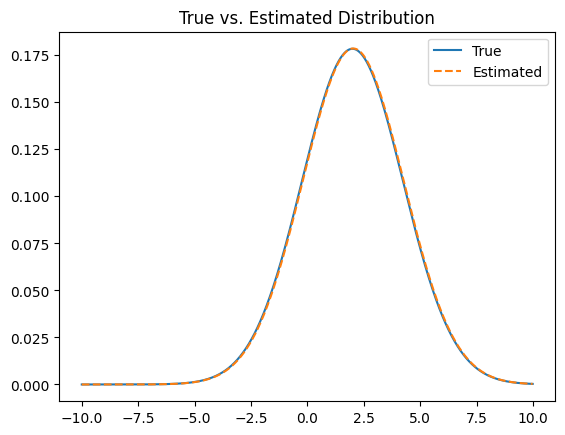

In [4]:
# Create a range of x-values for plotting the horizontal axis.
x_axis = np.arange(-10, 10, 0.01)

# Plot the PDF of the TRUE normal distribution as a solid blue line.
plt.plot(x_axis, norm.pdf(x_axis, true_mean, np.sqrt(true_var)), label='True')

# On the same graph, plot the PDF of the ESTIMATED normal distribution as a dashed orange line.
plt.plot(x_axis, norm.pdf(x_axis, est_mean, np.sqrt(est_var)), "--", label='Estimated')

# Add a title and legend to the plot.
plt.title('True vs. Estimated Distribution')
plt.legend()

# Display the final plot.
plt.show()